# Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
import scipy
import time
import collections
import itertools
import librosa
import pickle

In [2]:
#directory to training data and json file
train_dir='D:/SEPR/Main Data-Raw/nsynth-train/audio/'
#directory to training data and json file
valid_dir='D:/SEPR/Main Data-Raw/nsynth-valid/audio/'
#directory to training data and json file
test_dir='D:/SEPR/Main Data-Raw/nsynth-test/audio/'

In [6]:
#read the raw json files as given in the training set
df_train_raw = pd.read_json(path_or_buf='D:/SEPR/Main Data-Raw/nsynth-train/examples.json', orient='index')

# Extract Filename Datafiles for Training Sets

In [7]:
#Get a count of instruments in ascending order
n_class_train= df_train_raw['instrument_family'].value_counts(ascending=True)
n_class_train

instrument_family
9      5501
2      8773
10    10208
1     12675
7     13911
8     19474
3     32690
5     34201
6     34477
4     51821
0     65474
Name: count, dtype: int64

**FILENAME DATA-2000 TRAINING SAMPLES.**

In [6]:
#Sample n files
df_train_sample2000=df_train_raw.groupby('instrument_family', as_index=False, #group by instrument family
                               group_keys=False).apply(lambda df: df.sample(2000)) #number of samples
#drop the synth_lead from the training dataset
df_train_sample2000= df_train_sample2000[df_train_sample2000['instrument_family']!=9]

In [7]:
df_train_sample2000.head()

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
bass_synthetic_065-022-025,151496,16000,22,2,bass,bass_synthetic_065,bass_synthetic_065-022-025,[tempo-synced],synthetic,25,0,624,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
bass_synthetic_123-023-127,150397,16000,23,2,bass,bass_synthetic_123,bass_synthetic_123-023-127,"[dark, distortion, fast_decay, percussive]",synthetic,127,0,890,"[0, 1, 1, 1, 0, 0, 0, 1, 0, 0]"
bass_synthetic_044-059-100,173084,16000,59,2,bass,bass_synthetic_044,bass_synthetic_044-059-100,[dark],synthetic,100,0,481,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
bass_synthetic_080-097-127,264925,16000,97,2,bass,bass_synthetic_080,bass_synthetic_080-097-127,"[distortion, fast_decay, percussive]",synthetic,127,0,708,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0]"
bass_synthetic_084-069-050,161312,16000,69,2,bass,bass_synthetic_084,bass_synthetic_084-069-050,"[bright, distortion, nonlinear_env]",synthetic,50,0,726,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 0]"


In [8]:
df_train_sample2000.shape

(20000, 13)

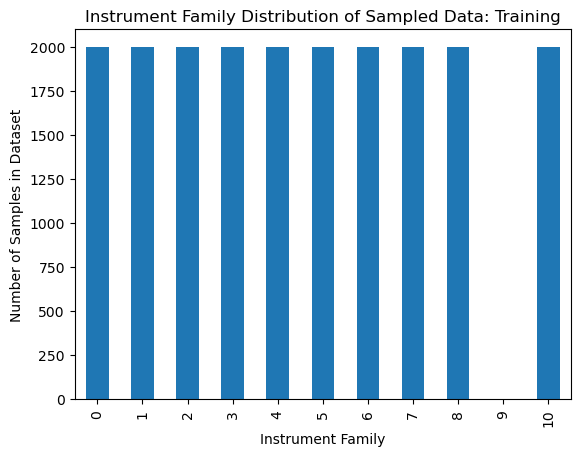

In [14]:
#Display instrument distrution
df_train_sample2000['instrument_family'].value_counts().reindex(np.arange(0,len(n_class_train), 1)).plot(kind='bar')
plt.title("Instrument Family Distribution of Sampled Data: Training")
plt.xlabel('Instrument Family')
plt.ylabel('Number of Samples in Dataset')
plt.show()

In [15]:
#save the train file index as list
filenames_train2000 = df_train_sample2000.index.tolist()

In [17]:
#save the list to a pickle file
with open('D:/SEPR/Data Filenames/filenames_train2000.pickle', 'wb') as f:
    pickle.dump(filenames_train2000, f)

**FILENAME DATA-3000 TRAINING SAMPLES.**

In [18]:
#Sample n files
df_train_sample3000=df_train_raw.groupby('instrument_family', as_index=False, #group by instrument family
                               group_keys=False).apply(lambda df: df.sample(3000)) #number of samples
#drop the synth_lead from the training dataset
df_train_sample3000= df_train_sample3000[df_train_sample3000['instrument_family']!=9]

In [19]:
df_train_sample3000.head()

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
bass_electronic_014-052-127,231998,16000,52,1,bass,bass_electronic_014,bass_electronic_014-052-127,[distortion],electronic,127,0,654,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
bass_synthetic_111-096-127,174464,16000,96,2,bass,bass_synthetic_111,bass_synthetic_111-096-127,"[fast_decay, percussive]",synthetic,127,0,860,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
bass_synthetic_020-108-075,241229,16000,108,2,bass,bass_synthetic_020,bass_synthetic_020-108-075,"[bright, fast_decay, percussive]",synthetic,75,0,294,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
bass_synthetic_030-078-100,258097,16000,78,2,bass,bass_synthetic_030,bass_synthetic_030-078-100,[],synthetic,100,0,390,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
bass_synthetic_131-080-100,201426,16000,80,2,bass,bass_synthetic_131,bass_synthetic_131-080-100,[distortion],synthetic,100,0,909,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"


In [20]:
df_train_sample3000.shape

(30000, 13)

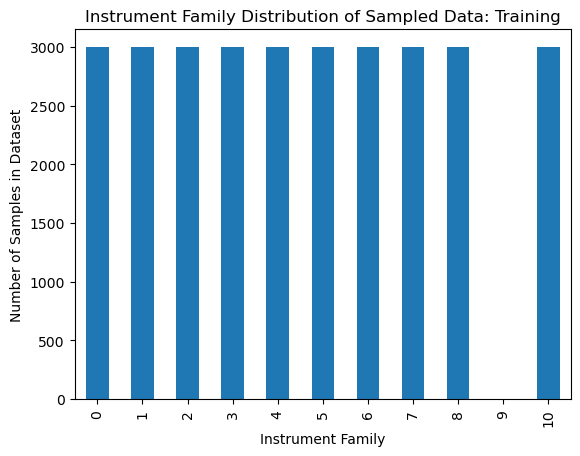

In [21]:
#Display instrument distrution
df_train_sample3000['instrument_family'].value_counts().reindex(np.arange(0,len(n_class_train), 1)).plot(kind='bar')
plt.title("Instrument Family Distribution of Sampled Data: Training")
plt.xlabel('Instrument Family')
plt.ylabel('Number of Samples in Dataset')
plt.show()

In [22]:
#save the train file index as list
filenames_train3000 = df_train_sample3000.index.tolist()

In [23]:
#save the list to a pickle file
with open('D:/SEPR/Data Filenames/filenames_train3000.pickle', 'wb') as f:
    pickle.dump(filenames_train3000, f)

**FILENAME DATA-5000 TRAINING SAMPLES.**

In [40]:
#Sample n files
df_train_sample5000=df_train_raw.groupby('instrument_family', as_index=False, #group by instrument family
                               group_keys=False).apply(lambda df: df.sample(5000)) #number of samples
#drop the synth_lead from the training dataset
df_train_sample5000= df_train_sample5000[df_train_sample5000['instrument_family']!=9]

In [41]:
df_train_sample5000.head()

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
bass_synthetic_116-069-127,273088,16000,69,2,bass,bass_synthetic_116,bass_synthetic_116-069-127,"[dark, fast_decay, percussive]",synthetic,127,0,870,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0]"
bass_synthetic_018-045-050,58663,16000,45,2,bass,bass_synthetic_018,bass_synthetic_018-045-050,"[distortion, fast_decay]",synthetic,50,0,276,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]"
bass_synthetic_011-040-075,186786,16000,40,2,bass,bass_synthetic_011,bass_synthetic_011-040-075,"[bright, distortion, long_release]",synthetic,75,0,160,"[1, 0, 1, 0, 1, 0, 0, 0, 0, 0]"
bass_synthetic_076-046-050,242626,16000,46,2,bass,bass_synthetic_076,bass_synthetic_076-046-050,"[dark, distortion]",synthetic,50,0,691,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]"
bass_synthetic_136-070-075,192269,16000,70,2,bass,bass_synthetic_136,bass_synthetic_136-070-075,[],synthetic,75,0,929,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [42]:
df_train_sample5000.shape

(50000, 13)

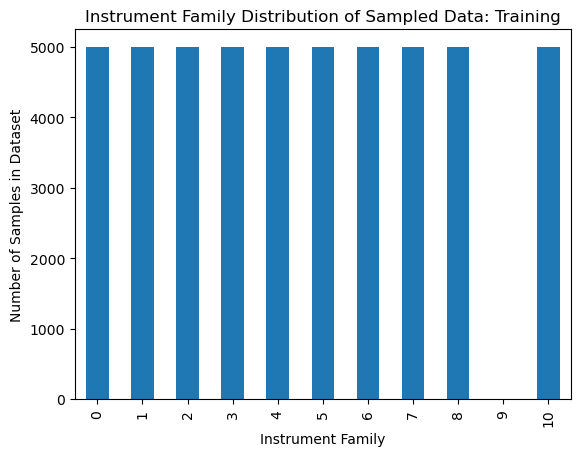

In [43]:
#Display instrument distrution
df_train_sample5000['instrument_family'].value_counts().reindex(np.arange(0,len(n_class_train), 1)).plot(kind='bar')
plt.title("Instrument Family Distribution of Sampled Data: Training")
plt.xlabel('Instrument Family')
plt.ylabel('Number of Samples in Dataset')
plt.show()

In [44]:
#save the train file index as list
filenames_train5000 = df_train_sample5000.index.tolist()

In [46]:
#save the list to a pickle file
with open('D:/SEPR/Data Filenames/filenames_train5000.pickle', 'wb') as f:
    pickle.dump(filenames_train5000, f)

**FILENAME DATA-8500 TRAINING SAMPLES.**

In [8]:
# Remove class 9 from the DataFrame
df_train_raw_filtered = df_train_raw[df_train_raw['instrument_family'] != 9]

# Sample 8500 samples from each remaining class
df_train_sample8500 = df_train_raw_filtered.groupby('instrument_family', as_index=False, 
                                        group_keys=False).apply(lambda df: df.sample(8500))

In [9]:
df_train_sample8500.head()

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
bass_synthetic_072-103-050,64774,16000,103,2,bass,bass_synthetic_072,bass_synthetic_072-103-050,"[bright, distortion]",synthetic,50,0,670,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
bass_electronic_005-041-075,125417,16000,41,1,bass,bass_electronic_005,bass_electronic_005-041-075,[],electronic,75,0,478,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
bass_electronic_032-048-050,255393,16000,48,1,bass,bass_electronic_032,bass_electronic_032-048-050,[distortion],electronic,50,0,935,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
bass_synthetic_084-057-075,285033,16000,57,2,bass,bass_synthetic_084,bass_synthetic_084-057-075,"[bright, distortion, nonlinear_env]",synthetic,75,0,726,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 0]"
bass_synthetic_114-082-127,252465,16000,82,2,bass,bass_synthetic_114,bass_synthetic_114-082-127,"[bright, distortion]",synthetic,127,0,868,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"


In [10]:
df_train_sample8500.shape

(85000, 13)

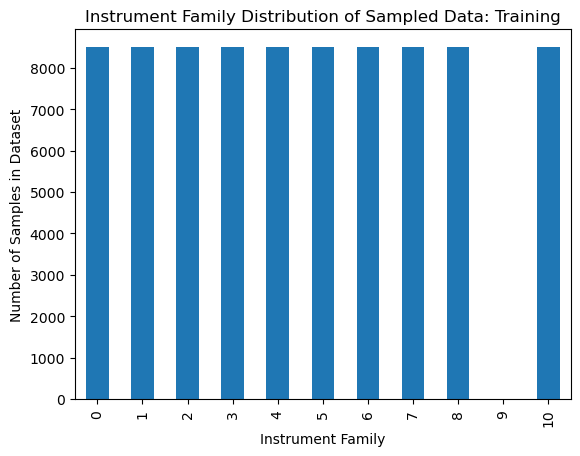

In [11]:
#Display instrument distrution
df_train_sample8500['instrument_family'].value_counts().reindex(np.arange(0,len(n_class_train), 1)).plot(kind='bar')
plt.title("Instrument Family Distribution of Sampled Data: Training")
plt.xlabel('Instrument Family')
plt.ylabel('Number of Samples in Dataset')
plt.show()

In [12]:
#save the train file index as list
filenames_train8500 = df_train_sample8500.index.tolist()

In [13]:
#save the list to a pickle file
with open('D:/SEPR/Data Filenames/filenames_train8500.pickle', 'wb') as f:
    pickle.dump(filenames_train8500, f)

# Extract Filename Datafiles for Validation and Testing Sets

In [47]:
#extract the filenames from the validation dataset
df_valid = pd.read_json(path_or_buf='D:/SEPR/Main Data-Raw/nsynth-valid/examples.json', orient='index')

#save the train file index as list
filenames_valid = df_valid.index.tolist()

#save the list to a pickle file
with open('D:/SEPR/Data Filenames/filenames_valid.pickle', 'wb') as f:
    pickle.dump(filenames_valid, f)

In [48]:
#extract the filenames from the testing dataset
df_test = pd.read_json(path_or_buf='D:/SEPR/Main Data-Raw/nsynth-test/examples.json', orient='index')

#save the train file index as list
filenames_test = df_test.index.tolist()

#save the list to a pickle file
with open('D:/SEPR/Data Filenames/filenames_test.pickle', 'wb') as f:
    pickle.dump(filenames_test, f)

# Define Methods Used for Feature Extraction of Raw Data files (from Wav files)

In [3]:
def feature_extract(file):
    """
    Define function that takes in a file an returns features in an array
    """
    
    #get wave representation
    y, sr = librosa.load(file)
        
    #determine if instruemnt is harmonic or percussive by comparing means
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    if np.mean(y_harmonic)>np.mean(y_percussive):
        harmonic=1
    else:
        harmonic=0
        
    #Mel-frequency cepstral coefficients (MFCCs)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #temporal averaging
    mfcc=np.mean(mfcc,axis=1)
    
    #get the mel-scaled spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)  
    #temporally average spectrogram
    spectrogram = np.mean(spectrogram, axis = 1)
    
    #compute chroma energy
    chroma = librosa.feature.chroma_cens(y=y, sr=sr)
    #temporally average chroma
    chroma = np.mean(chroma, axis = 1)
    
    #compute spectral contrast
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    contrast = np.mean(contrast, axis= 1)
    
    return [harmonic, mfcc, spectrogram, chroma, contrast]

The function above can take a lot of time for large datasets. It is advisisable to start out on small samples to get an estimate of running time.

In [4]:
def instrument_code(filename):
    """
    Function that takes in a filename and returns instrument based on naming convention
    """
    class_names=['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'vocal']
    
    for name in class_names:
        if name in filename:
            return class_names.index(name)
    else:
        return None

# Testing Set

In [145]:
start_train = time.time()

#create dictionary to store all test features
dict_test = {}
#loop over every file in the list
for file in filenames_test:
    #extract the features
    features = feature_extract(test_dir+ file + '.wav') #specify directory and .wav
    #add dictionary entry
    dict_test[file] = features

end_train=time.time()
print('Time to extract {} files is {} seconds'.format(len(filenames_test), end_train - start_train))

C:\Users\DAVID\miniforge3\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Time to extract 4096 files is 1191.6510112285614 seconds


In [146]:
#convert dict to dataframe
features_test = pd.DataFrame.from_dict(dict_test, orient='index',
                                       columns=['harmonic', 'mfcc', 'spectro', 'chroma', 'contrast'])

features_test.head()

,harmonic,mfcc,spectro,chroma,contrast
bass_synthetic_068-049-025,1,"[-522.86584, 46.664154, 34.379803, 24.787596, ...","[0.010030984, 0.026242843, 0.043270785, 0.0930...","[0.14567767, 0.8257, 0.07661895, 0.034161784, ...","[35.980842137432994, 29.09917381972148, 27.838..."
keyboard_electronic_001-021-127,0,"[-444.644, 193.89053, 27.298918, -3.6895258, 6...","[0.055242054, 0.1996687, 11.731721, 20.330856,...","[0.08902063, 0.10597091, 0.077824585, 0.392217...","[19.94874733237352, 19.84175224313626, 18.7577..."
guitar_acoustic_010-066-100,0,"[-439.3734, 59.546818, 2.8950784, -12.039842, ...","[0.0014635245, 0.0026336876, 0.0022025616, 0.0...","[0.10209415, 0.11988667, 0.064387664, 0.072573...","[12.373104241522551, 34.622547072819295, 35.31..."
reed_acoustic_037-068-127,1,"[-372.98746, 68.7968, -39.474766, -22.089413, ...","[0.00014575855, 0.0004633764, 0.00040781248, 2...","[0.05025812, 0.038772635, 0.023343502, 0.36616...","[19.619556842935015, 25.605343916274308, 30.76..."
flute_acoustic_002-077-100,1,"[-364.77966, 12.566915, -42.826504, 19.884624,...","[4.9267674e-05, 0.00012820748, 0.00046132298, ...","[0.07728491, 0.08046897, 0.073985286, 0.037789...","[20.514580554636808, 10.440254848153995, 40.26..."


In [147]:
#extract mfccs
mfcc_test = pd.DataFrame(features_test.mfcc.values.tolist(),index=features_test.index)
mfcc_test = mfcc_test.add_prefix('mfcc_')

#extract spectro
spectro_test = pd.DataFrame(features_test.spectro.values.tolist(),index=features_test.index)
spectro_test = spectro_test.add_prefix('spectro_')


#extract chroma
chroma_test = pd.DataFrame(features_test.chroma.values.tolist(),index=features_test.index)
chroma_test = chroma_test.add_prefix('chroma_')


#extract contrast
contrast_test = pd.DataFrame(features_test.contrast.values.tolist(),index=features_test.index)
contrast_test = chroma_test.add_prefix('contrast_')

#drop the old columns
features_test = features_test.drop(labels=['mfcc', 'spectro', 'chroma', 'contrast'], axis=1)

#concatenate
df_features_test=pd.concat([features_test, mfcc_test, spectro_test, chroma_test, contrast_test],
                           axis=1, join='inner')
df_features_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_2,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11
bass_synthetic_068-049-025,1,-522.865845,46.664154,34.379803,24.787596,17.420425,10.198804,4.609536,1.380600,-1.023340,...,0.076619,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298918,-3.689526,6.295263,8.093068,10.283858,6.089181,2.495069,...,0.077825,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007
guitar_acoustic_010-066-100,0,-439.373413,59.546818,2.895078,-12.039842,-12.553241,-11.451952,-12.535439,-20.456724,-19.256969,...,0.064388,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089413,-50.149693,-16.565742,-29.849129,-16.627386,-17.712204,...,0.023344,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826504,19.884624,-29.598232,-21.321131,-18.308311,-9.495085,7.672026,...,0.073985,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970


In [148]:
targets_test = []
for name in df_features_test.index.tolist():
    targets_test.append(instrument_code(name))

df_features_test['targets'] = targets_test

In [149]:
#save the dataframe to a pickle file
with open('D:/SEPR/Usable Dataframes/df_features_test.pickle', 'wb') as f:
    pickle.dump(df_features_test, f)

In [150]:
df_features_test.shape

(4096, 167)

# Traning Set

**DATAFRAME FOR 2000 SAMPLES.**

In [57]:
start_train = time.time()

#create dictionary to store all test features
dict_train2000 = {}
#loop over every file in the list
for file in filenames_train2000:
    #extract the features
    features2000 = feature_extract(train_dir+ file + '.wav') #specify directory and .wav
    #add dictionary entry
    dict_train2000[file] = features2000

end_train=time.time()
print('Time to extract {} files is {} seconds'.format(len(filenames_train2000), end_train - start_train))

Time to extract 20000 files is 6053.310042381287 seconds


In [67]:
#convert dict to dataframe
features_train2000 = pd.DataFrame.from_dict(dict_train2000, orient='index',
                                       columns=['harmonic', 'mfcc', 'spectro', 'chroma', 'contrast'])

features_train2000.head()

,harmonic,mfcc,spectro,chroma,contrast
bass_synthetic_065-022-025,1,"[-304.04565, 210.44286, -29.364252, -12.138075...","[21.167479, 145.8559, 137.40619, 10.698716, 56...","[0.17924824, 0.09266005, 0.21178143, 0.0398152...","[18.43953900529089, 11.9211389691958, 12.45821..."
bass_synthetic_123-023-127,1,"[-581.1227, 19.400276, 13.1610985, 12.068445, ...","[4.106476, 7.128693, 8.284823, 8.739829, 7.459...","[0.43068504, 0.18315233, 0.091580816, 0.098517...","[13.771603572063887, 10.78844800245017, 10.404..."
bass_synthetic_044-059-100,0,"[-504.3477, 50.102257, 31.777626, 25.453201, 2...","[1.4795893, 1.207629, 0.9231937, 0.70041496, 0...","[0.12903897, 0.3038921, 0.10442352, 0.08629037...","[20.856278672673096, 37.00751225507263, 26.375..."
bass_synthetic_080-097-127,1,"[-601.4331, 1.1553289, -3.3519464, 3.3078527, ...","[0.13932997, 0.1948717, 0.1222925, 0.061644845...","[0.36357778, 0.43479553, 0.28841555, 0.2385127...","[20.878601461639313, 15.610665438892962, 16.04..."
bass_synthetic_084-069-050,1,"[-277.72382, 78.03981, -47.80999, -9.798298, -...","[0.10466925, 0.008651831, 0.0077880933, 0.0073...","[0.08400269, 0.081647314, 0.06896016, 0.045113...","[19.61196027874862, 12.221414870291094, 24.260..."


In [68]:
#extract mfccs
mfcc_train2000 = pd.DataFrame(features_train2000.mfcc.values.tolist(),
                          index=features_train2000.index)
mfcc_train2000 = mfcc_train2000.add_prefix('mfcc_')

#extract spectro
spectro_train2000 = pd.DataFrame(features_train2000.spectro.values.tolist(),
                             index=features_train2000.index)
spectro_train2000 = spectro_train2000.add_prefix('spectro_')


#extract chroma
chroma_train2000 = pd.DataFrame(features_train2000.chroma.values.tolist(),
                            index=features_train2000.index)
chroma_train2000 = chroma_train2000.add_prefix('chroma_')


#extract contrast
contrast_train2000 = pd.DataFrame(features_train2000.contrast.values.tolist(),
                              index=features_train2000.index)
contrast_train2000 = chroma_train2000.add_prefix('contrast_')

#drop the old columns
features_train2000 = features_train2000.drop(labels=['mfcc', 'spectro', 'chroma', 'contrast'], axis=1)

#concatenate
df_features_train2000=pd.concat([features_train2000, mfcc_train2000, spectro_train2000, chroma_train2000, contrast_train2000],
                           axis=1, join='inner')
df_features_train2000.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_2,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11
bass_synthetic_065-022-025,1,-304.045654,210.442856,-29.364252,-12.138075,22.309427,6.090194,4.480891,5.651807,8.733890,...,0.211781,0.039815,0.026104,0.360312,0.028782,0.020647,0.095135,0.168710,0.682694,0.268308
bass_synthetic_123-023-127,1,-581.122681,19.400276,13.161098,12.068445,10.101112,9.067916,7.615374,6.580825,5.609818,...,0.091581,0.098517,0.063681,0.055177,0.216819,0.042083,0.123787,0.144742,0.461804,0.491225
bass_synthetic_044-059-100,0,-504.347687,50.102257,31.777626,25.453201,22.285028,14.276178,7.285074,2.552428,-3.053812,...,0.104424,0.086290,0.071110,0.059363,0.047126,0.048548,0.058193,0.049593,0.047131,0.772857
bass_synthetic_080-097-127,1,-601.433105,1.155329,-3.351946,3.307853,3.557914,-0.089697,-1.921454,2.518064,3.118459,...,0.288416,0.238513,0.159288,0.209015,0.139147,0.163444,0.201258,0.268439,0.209768,0.241758
bass_synthetic_084-069-050,1,-277.723816,78.039810,-47.809990,-9.798298,-23.077721,-1.533361,-6.860663,9.153872,1.950342,...,0.068960,0.045113,0.210715,0.047381,0.053805,0.041415,0.331384,0.799234,0.137420,0.029709


In [69]:
targets_train2000 = []
for name in df_features_train2000.index.tolist():
    targets_train2000.append(instrument_code(name))


In [70]:
df_features_train2000['targets'] = targets_train2000

In [71]:
#save the dataframe to a pickle file
with open('D:/SEPR/Usable Dataframes/df_features_train2000.pickle', 'wb') as f:
    pickle.dump(df_features_train2000, f)

In [72]:
df_features_train2000.shape

(20000, 167)

**DATAFRAME FOR 3000 SAMPLES.**

In [74]:
start_train = time.time()

#create dictionary to store all test features
dict_train3000 = {}
#loop over every file in the list
for file in filenames_train3000:
    #extract the features
    features3000 = feature_extract(train_dir+ file + '.wav') #specify directory and .wav
    #add dictionary entry
    dict_train3000[file] = features3000

end_train = time.time()
print('Time to extract {} files is {} seconds'.format(len(filenames_train3000), end_train - start_train))

C:\Users\DAVID\miniforge3\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Time to extract 30000 files is 9418.207812309265 seconds


In [75]:
#convert dict to dataframe
features_train3000 = pd.DataFrame.from_dict(dict_train3000, orient='index',
                                       columns=['harmonic', 'mfcc', 'spectro', 'chroma', 'contrast'])

features_train3000.head()

,harmonic,mfcc,spectro,chroma,contrast
bass_electronic_014-052-127,0,"[-512.5133, 49.23988, 36.635098, 36.231136, 25...","[0.026952336, 0.5289991, 3.1581783, 5.8451524,...","[0.051248524, 0.060067415, 0.07451391, 0.10353...","[33.25246283611422, 24.013633695764135, 24.514..."
bass_synthetic_111-096-127,1,"[-638.1119, 2.3468313, -3.926074, 3.1347923, -...","[0.071333334, 0.03221248, 0.016793502, 0.01452...","[0.39360568, 0.36333784, 0.2531345, 0.20654707...","[14.770466954358561, 14.808478417155156, 14.89..."
bass_synthetic_020-108-075,1,"[-564.2687, -1.4207298, -0.7951489, 3.250593, ...","[6.8904924e-06, 6.1305473e-06, 7.312074e-06, 4...","[0.5565392, 0.35451382, 0.3070062, 0.27557173,...","[29.323610648837292, 29.595628858189304, 29.38..."
bass_synthetic_030-078-100,1,"[-472.5625, 15.968258, -23.635908, -8.557285, ...","[0.5934803, 0.0045069796, 0.00048199456, 0.000...","[0.069321476, 0.41762802, 0.08638957, 0.037287...","[35.15778748811148, 12.796795077788227, 41.058..."
bass_synthetic_131-080-100,0,"[-502.14285, 30.960215, 21.1209, 21.180164, 18...","[16.68463, 0.22678283, 0.14619063, 0.0699136, ...","[0.3232929, 0.4115325, 0.29992715, 0.3308701, ...","[28.268857881789327, 17.190105858731375, 16.85..."


In [76]:
#extract mfccs
mfcc_train3000 = pd.DataFrame(features_train3000.mfcc.values.tolist(),
                          index=features_train3000.index)
mfcc_train3000 = mfcc_train3000.add_prefix('mfcc_')

#extract spectro
spectro_train3000 = pd.DataFrame(features_train3000.spectro.values.tolist(),
                             index=features_train3000.index)
spectro_train3000 = spectro_train3000.add_prefix('spectro_')

#extract chroma
chroma_train3000 = pd.DataFrame(features_train3000.chroma.values.tolist(),
                            index=features_train3000.index)
chroma_train3000 = chroma_train3000.add_prefix('chroma_')

#extract contrast
contrast_train3000 = pd.DataFrame(features_train3000.contrast.values.tolist(),
                              index=features_train3000.index)
contrast_train3000 = chroma_train3000.add_prefix('contrast_')

#drop the old columns
features_train3000 = features_train3000.drop(labels=['mfcc', 'spectro', 'chroma', 'contrast'], axis=1)

#concatenate
df_features_train3000 = pd.concat([features_train3000, mfcc_train3000, spectro_train3000, chroma_train3000, contrast_train3000],
                           axis=1, join='inner')
df_features_train3000.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_2,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11
bass_electronic_014-052-127,0,-512.513306,49.239880,36.635098,36.231136,25.086309,17.622725,12.361383,6.291051,1.361823,...,0.074514,0.103532,0.832282,0.112285,0.067642,0.073308,0.077919,0.107368,0.076912,0.052838
bass_synthetic_111-096-127,1,-638.111877,2.346831,-3.926074,3.134792,-1.294184,2.011733,-2.365173,1.458554,0.189836,...,0.253134,0.206547,0.179271,0.219101,0.196307,0.249212,0.267878,0.303538,0.249895,0.240109
bass_synthetic_020-108-075,1,-564.268677,-1.420730,-0.795149,3.250593,-3.291362,1.071149,2.291963,-3.577422,2.212168,...,0.307006,0.275572,0.221840,0.195931,0.186434,0.132046,0.122447,0.112924,0.111629,0.168877
bass_synthetic_030-078-100,1,-472.562500,15.968258,-23.635908,-8.557285,4.469436,-3.720913,-8.350245,-3.516767,5.632018,...,0.086390,0.037288,0.060668,0.057510,0.781476,0.074805,0.064859,0.049139,0.026667,0.043386
bass_synthetic_131-080-100,0,-502.142853,30.960215,21.120899,21.180164,18.814318,18.428780,17.238117,16.952642,16.951662,...,0.299927,0.330870,0.322940,0.270194,0.209055,0.281756,0.253423,0.167752,0.158776,0.133259


In [77]:
targets_train3000 = []
for name in df_features_train3000.index.tolist():
    targets_train3000.append(instrument_code(name))

In [78]:
df_features_train3000['targets'] = targets_train3000

In [79]:
#save the dataframe to a pickle file
with open('D:/SEPR/Usable Dataframes/df_features_train3000.pickle', 'wb') as f:
    pickle.dump(df_features_train3000, f)

In [80]:
df_features_train3000.shape

(30000, 167)

**DATAFRAME FOR 5000 SAMPLES.**

In [83]:
start_train = time.time()

#create dictionary to store all test features
dict_train5000 = {}
#loop over every file in the list
for file in filenames_train5000:
    #extract the features
    features5000 = feature_extract(train_dir+ file + '.wav') #specify directory and .wav
    #add dictionary entry
    dict_train5000[file] = features5000

end_train=time.time()
print('Time to extract {} files is {} seconds'.format(len(filenames_train5000), end_train - start_train))

C:\Users\DAVID\miniforge3\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Time to extract 50000 files is 14877.508383989334 seconds


In [84]:
#convert dict to dataframe
features_train5000 = pd.DataFrame.from_dict(dict_train5000, orient='index',
                                       columns=['harmonic', 'mfcc', 'spectro', 'chroma', 'contrast'])

features_train5000.head()

,harmonic,mfcc,spectro,chroma,contrast
bass_synthetic_116-069-127,0,"[-557.2025, 5.753622, 0.9814124, 1.1223052, -0...","[0.004640374, 0.009043959, 0.011839996, 0.0108...","[0.28451654, 0.3183868, 0.3013875, 0.20143035,...","[11.65933384581837, 12.742175217049349, 17.937..."
bass_synthetic_018-045-050,1,"[-485.26913, 36.70652, 1.1676404, 9.230674, 6....","[0.10320466, 0.054044552, 0.118848495, 27.6461...","[0.17470407, 0.14008594, 0.10998356, 0.0707664...","[20.053583773159836, 18.93932964597301, 19.825..."
bass_synthetic_011-040-075,0,"[-133.16849, 111.22785, -37.39596, 53.72023, -...","[0.09908093, 3.1063895, 648.97754, 694.52594, ...","[0.00089499564, 0.0, 0.07546153, 0.14470187, 0...","[31.421022334863707, 25.375688164549892, 29.37..."
bass_synthetic_076-046-050,0,"[-382.0848, 118.212, 26.205984, 30.567608, 59....","[11.960373, 902.61017, 884.77124, 493.42572, 3...","[0.06061528, 0.040121198, 0.031176683, 0.02520...","[26.386310550210453, 27.011399092954246, 32.71..."
bass_synthetic_136-070-075,0,"[-569.8036, 25.86441, 14.324016, 12.227025, 7....","[4.532453, 4.857738, 1.1878691, 0.65478694, 0....","[0.2142188, 0.26918525, 0.23244482, 0.2637368,...","[33.32357218289626, 14.863404573577789, 32.415..."


In [85]:
#extract mfccs
mfcc_train5000 = pd.DataFrame(features_train5000.mfcc.values.tolist(),
                          index=features_train5000.index)
mfcc_train5000 = mfcc_train5000.add_prefix('mfcc_')

#extract spectro
spectro_train5000 = pd.DataFrame(features_train5000.spectro.values.tolist(),
                             index=features_train5000.index)
spectro_train5000 = spectro_train5000.add_prefix('spectro_')

#extract chroma
chroma_train5000 = pd.DataFrame(features_train5000.chroma.values.tolist(),
                            index=features_train5000.index)
chroma_train5000 = chroma_train5000.add_prefix('chroma_')

#extract contrast
contrast_train5000 = pd.DataFrame(features_train5000.contrast.values.tolist(),
                              index=features_train5000.index)
contrast_train5000 = chroma_train5000.add_prefix('contrast_')

#drop the old columns
features_train5000 = features_train5000.drop(labels=['mfcc', 'spectro', 'chroma', 'contrast'], axis=1)

#concatenate
df_features_train5000 = pd.concat([features_train5000, mfcc_train5000, spectro_train5000, chroma_train5000, contrast_train5000],
                           axis=1, join='inner')
df_features_train5000.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_2,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11
bass_synthetic_116-069-127,0,-557.202515,5.753622,0.981412,1.122305,-0.707372,-0.898609,-2.331761,-2.756625,-2.927740,...,0.301387,0.201430,0.145789,0.131073,0.208323,0.217919,0.228780,0.417073,0.268706,0.291228
bass_synthetic_018-045-050,1,-485.269135,36.706520,1.167640,9.230674,6.142095,1.939157,0.921259,2.714334,2.793374,...,0.109984,0.070766,0.107711,0.089044,0.094892,0.183850,0.316033,0.617227,0.313992,0.194215
bass_synthetic_011-040-075,0,-133.168488,111.227852,-37.395962,53.720230,-23.686741,31.263220,-22.156073,11.038134,-9.746903,...,0.075462,0.144702,0.892014,0.050649,0.004439,0.000000,0.186057,0.000895,0.000000,0.327075
bass_synthetic_076-046-050,0,-382.084808,118.211998,26.205984,30.567608,59.839611,35.354507,12.117772,24.512486,22.956745,...,0.031177,0.025208,0.017774,0.017762,0.017743,0.034988,0.064068,0.182555,0.841185,0.145308
bass_synthetic_136-070-075,0,-569.803589,25.864410,14.324016,12.227025,7.293108,4.873456,2.179953,1.358275,1.030449,...,0.232445,0.263737,0.236430,0.261355,0.279773,0.167548,0.234745,0.059394,0.464480,0.081960


In [86]:
targets_train5000 = []
for name in df_features_train5000.index.tolist():
    targets_train5000.append(instrument_code(name))

In [87]:
df_features_train5000['targets'] = targets_train5000

In [88]:
# Save the DataFrame to a pickle file
with open('D:/SEPR/Usable Dataframes/df_features_train5000.pickle', 'wb') as f:
    pickle.dump(df_features_train5000, f)

In [89]:
df_features_train5000.shape

(50000, 167)

**DATAFRAME FOR 8500 SAMPLES.**

In [14]:
start_train = time.time()

#create dictionary to store all test features
dict_train8500 = {}
#loop over every file in the list
for file in filenames_train8500:
    #extract the features
    features8500 = feature_extract(train_dir+ file + '.wav') #specify directory and .wav
    #add dictionary entry
    dict_train8500[file] = features8500

end_train=time.time()
print('Time to extract {} files is {} seconds'.format(len(filenames_train8500), end_train - start_train))

C:\Users\DAVID\miniforge3\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Time to extract 85000 files is 25895.47055387497 seconds


In [15]:
# convert dict to dataframe
features_train8500 = pd.DataFrame.from_dict(dict_train8500, orient='index',
                                       columns=['harmonic', 'mfcc', 'spectro', 'chroma', 'contrast'])

features_train8500.head()

,harmonic,mfcc,spectro,chroma,contrast
bass_synthetic_072-103-050,1,"[-259.1204, 16.254854, -48.6539, 56.044502, -4...","[0.13004605, 0.0072842473, 0.025142383, 0.0116...","[0.0733006, 0.12581429, 0.10518499, 0.06400698...","[18.358565079851623, 26.506754727978738, 23.40..."
bass_electronic_005-041-075,1,"[-445.7055, 123.45984, 62.94537, 31.896797, 25...","[2.2169616, 3.2866735, 154.09894, 326.3165, 16...","[0.39881366, 0.07923191, 0.08746379, 0.0848581...","[29.413068429155036, 22.88734987978043, 27.154..."
bass_electronic_032-048-050,0,"[-441.67792, 54.611637, 19.976978, 48.740196, ...","[0.0067661256, 0.066926286, 0.6248893, 4.85759...","[0.82594866, 0.06635502, 0.045122437, 0.032339...","[34.58179444932672, 29.261612128154585, 24.449..."
bass_synthetic_084-057-075,1,"[-267.8391, 111.26355, -42.105766, 1.3281927, ...","[0.7589831, 0.011811236, 0.010839226, 0.010518...","[0.07345964, 0.091045, 0.07063856, 0.058074098...","[21.855462262307796, 25.989365218072557, 31.74..."
bass_synthetic_114-082-127,1,"[-264.46112, 36.348366, -42.848892, 43.28953, ...","[0.06535881, 0.39382803, 0.9928556, 1.1802152,...","[0.07195518, 0.06785916, 0.06991983, 0.0727451...","[17.983582736320248, 16.32805640376601, 13.776..."


In [16]:
# extract mfccs
mfcc_train8500 = pd.DataFrame(features_train8500.mfcc.values.tolist(),
                          index=features_train8500.index)
mfcc_train8500 = mfcc_train8500.add_prefix('mfcc_')

# extract spectro
spectro_train8500 = pd.DataFrame(features_train8500.spectro.values.tolist(),
                             index=features_train8500.index)
spectro_train8500 = spectro_train8500.add_prefix('spectro_')

# extract chroma
chroma_train8500 = pd.DataFrame(features_train8500.chroma.values.tolist(),
                            index=features_train8500.index)
chroma_train8500 = chroma_train8500.add_prefix('chroma_')

# extract contrast
contrast_train8500 = pd.DataFrame(features_train8500.contrast.values.tolist(),
                              index=features_train8500.index)
contrast_train8500 = contrast_train8500.add_prefix('contrast_')

# drop the old columns
features_train8500 = features_train8500.drop(labels=['mfcc', 'spectro', 'chroma', 'contrast'], axis=1)

# concatenate
df_features_train8500 = pd.concat([features_train8500, mfcc_train8500, spectro_train8500, chroma_train8500, contrast_train8500],
                           axis=1, join='inner')
df_features_train8500.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,chroma_9,chroma_10,chroma_11,contrast_0,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6
bass_synthetic_072-103-050,1,-259.120392,16.254854,-48.653900,56.044502,-48.498081,49.107578,-28.063169,33.163216,-29.868616,...,0.405159,0.016615,0.021126,18.358565,26.506755,23.400589,24.589065,33.968219,30.536804,70.548043
bass_electronic_005-041-075,1,-445.705505,123.459839,62.945370,31.896797,25.574553,24.210548,14.594964,0.539918,-4.144855,...,0.023119,0.019849,0.042269,29.413068,22.887350,27.154730,28.345323,21.895214,15.876317,38.530831
bass_electronic_032-048-050,0,-441.677917,54.611637,19.976978,48.740196,18.194162,17.925045,13.445016,-5.536787,5.831507,...,0.119997,0.132179,0.135995,34.581794,29.261612,24.449808,21.815215,19.180553,23.966423,53.539505
bass_synthetic_084-057-075,1,-267.839111,111.263550,-42.105766,1.328193,-11.390604,8.398848,-12.949695,-7.446430,-16.948307,...,0.814730,0.103571,0.024353,21.855462,25.989365,31.744667,26.859090,26.837624,23.338994,50.647930
bass_synthetic_114-082-127,1,-264.461121,36.348366,-42.848892,43.289532,-22.449223,25.279791,5.725794,35.342300,23.236238,...,0.058516,0.858397,0.068264,17.983583,16.328056,13.776016,33.808865,28.329224,27.039600,64.354064


In [17]:
targets_train8500 = []
for name in df_features_train8500.index.tolist():
    targets_train8500.append(instrument_code(name))

In [18]:
df_features_train8500['targets'] = targets_train8500

In [19]:
# Save the DataFrame to a pickle file
with open('D:/SEPR/Usable Dataframes/df_features_train8500.pickle', 'wb') as f:
    pickle.dump(df_features_train8500, f)

In [20]:
df_features_train8500.shape

(85000, 162)

# Validation Set

In [97]:
start_valid = time.time()

#create dictionary to store all test features
dict_valid = {}
#loop over every file in the list
for file in filenames_valid:
    #extract the features
    features = feature_extract(valid_dir+ file + '.wav') #specify directory and .wav
    #add dictionary entry
    dict_valid[file] = features

end_valid=time.time()
print('Time to extract {} files is {} seconds'.format(len(filenames_valid), end_valid - start_valid))

C:\Users\DAVID\miniforge3\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Time to extract 12678 files is 3813.5192358493805 seconds


In [98]:
#convert dict to dataframe
features_valid = pd.DataFrame.from_dict(dict_valid, orient='index',
                                       columns=['harmonic', 'mfcc', 'spectro', 'chroma', 'contrast'])

features_valid.head()

,harmonic,mfcc,spectro,chroma,contrast
keyboard_acoustic_004-060-025,1,"[-475.22824, 57.87193, 45.420784, 33.626812, 2...","[1.1800035, 2.747386, 0.977456, 2.6299977, 2.7...","[0.7166769, 0.118479714, 0.11610127, 0.0989934...","[20.836055149478796, 29.132286949620894, 28.20..."
bass_synthetic_033-050-100,1,"[-423.16907, 69.13416, 45.368763, 22.640657, 8...","[2.3157594, 0.028705621, 0.035071645, 0.127537...","[0.09737051, 0.10904769, 0.7844097, 0.29963982...","[30.73195972354172, 29.642560805844457, 32.866..."
bass_synthetic_009-052-050,0,"[-148.79364, 52.61936, -49.405605, 72.25869, -...","[0.8193135, 0.022450758, 0.012858485, 0.021302...","[0.0009445405, 0.0, 0.0019584536, 0.05426022, ...","[32.36753476703585, 30.655243580848182, 34.711..."
keyboard_electronic_003-064-127,0,"[-500.11624, 47.007904, 13.829727, 8.717096, 3...","[0.00067951524, 0.00301209, 0.016500076, 0.015...","[0.0, 0.0, 0.0009528077, 0.07996129, 0.7755068...","[17.152339488683374, 29.86701780590951, 30.170..."
bass_synthetic_034-030-050,1,"[-411.50037, 67.41016, 39.17504, 55.957653, 24...","[0.96107286, 4.642489, 84.4477, 434.8653, 83.9...","[0.046832282, 0.39849162, 0.027044924, 0.01652...","[28.739305323978442, 20.733269463609176, 20.37..."


In [99]:
#extract mfccs
mfcc_valid = pd.DataFrame(features_valid.mfcc.values.tolist(),
                          index=features_valid.index)
mfcc_valid = mfcc_valid.add_prefix('mfcc_')

#extract spectro
spectro_valid = pd.DataFrame(features_valid.spectro.values.tolist(),
                             index=features_valid.index)
spectro_valid = spectro_valid.add_prefix('spectro_')


#extract chroma
chroma_valid = pd.DataFrame(features_valid.chroma.values.tolist(),
                            index=features_valid.index)
chroma_valid = chroma_valid.add_prefix('chroma_')


#extract contrast
contrast_valid = pd.DataFrame(features_valid.contrast.values.tolist(),
                              index=features_valid.index)
contrast_valid = chroma_valid.add_prefix('contrast_')

#drop the old columns
features_valid = features_valid.drop(labels=['mfcc', 'spectro', 'chroma', 'contrast'], axis=1)

#concatenate
df_features_valid=pd.concat([features_valid, mfcc_valid, spectro_valid, chroma_valid, contrast_valid],
                           axis=1, join='inner')
df_features_valid.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_2,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11
keyboard_acoustic_004-060-025,1,-475.228241,57.871929,45.420784,33.626812,23.861397,16.505726,11.225737,6.615818,2.428365,...,0.116101,0.098993,0.212848,0.251691,0.214841,0.128957,0.139373,0.083054,0.056506,0.099800
bass_synthetic_033-050-100,1,-423.169067,69.134163,45.368763,22.640657,8.431943,1.126918,-2.505024,-3.276564,-2.163704,...,0.784410,0.299640,0.032777,0.035559,0.048770,0.008362,0.048000,0.265016,0.048340,0.031035
bass_synthetic_009-052-050,0,-148.793640,52.619362,-49.405605,72.258690,-47.938263,37.455559,-38.765915,19.981672,-24.018894,...,0.001958,0.054260,0.889927,0.049914,0.000945,0.000945,0.114643,0.000000,0.000000,0.434259
keyboard_electronic_003-064-127,0,-500.116241,47.007904,13.829727,8.717096,3.275880,-1.387258,-5.367673,-7.053994,-8.340773,...,0.000953,0.079961,0.775507,0.115766,0.052649,0.165960,0.116424,0.088785,0.002494,0.048147
bass_synthetic_034-030-050,1,-411.500366,67.410156,39.175041,55.957653,24.589691,26.617323,12.020113,12.310732,6.211542,...,0.027045,0.016523,0.055971,0.282434,0.750461,0.151187,0.031541,0.027086,0.033757,0.028578


In [100]:
targets_valid = []
for name in df_features_valid.index.tolist():
    targets_valid.append(instrument_code(name))

In [101]:
df_features_valid['targets'] = targets_valid

In [102]:
#save the dataframe to a pickle file
with open('D:/SEPR/Usable Dataframes/df_features_valid.pickle', 'wb') as f:
    pickle.dump(df_features_valid, f)

In [103]:
df_features_valid.shape

(12678, 167)

# Clean JSON Files

In [135]:
#extract qualities
train_qual = pd.DataFrame(df_train_sample.qualities.values.tolist(), index= df_train_sample.index)


#concatenate
json_train=pd.concat([df_train_sample, train_qual],
                           axis=1, join='inner')

json_train= json_train.drop(labels=['qualities'], axis=1)
json_train.head()

,instrument,instrument_family,instrument_family_str,instrument_source,instrument_source_str,instrument_str,note,note_str,pitch,qualities_str,...,0,1,2,3,4,5,6,7,8,9
bass_synthetic_107-056-075,836,0,bass,2,synthetic,bass_synthetic_107,165861,bass_synthetic_107-056-075,56,[dark],...,0,1,0,0,0,0,0,0,0,0
bass_synthetic_078-062-100,704,0,bass,2,synthetic,bass_synthetic_078,230104,bass_synthetic_078-062-100,62,[dark],...,0,1,0,0,0,0,0,0,0,0
bass_synthetic_106-038-025,833,0,bass,2,synthetic,bass_synthetic_106,235667,bass_synthetic_106-038-025,38,[distortion],...,0,0,1,0,0,0,0,0,0,0
bass_electronic_024-025-127,847,0,bass,1,electronic,bass_electronic_024,239754,bass_electronic_024-025-127,25,[distortion],...,0,0,1,0,0,0,0,0,0,0
bass_synthetic_094-094-025,781,0,bass,2,synthetic,bass_synthetic_094,215683,bass_synthetic_094-094-025,94,[],...,0,0,0,0,0,0,0,0,0,0


In [136]:
#save the dataframe to a pickle file
with open('DataWrangling/json_train.pickle', 'wb') as f:
    pickle.dump(json_train, f)

In [138]:
#extract qualities
test_qual = pd.DataFrame(df_test.qualities.values.tolist(), index= df_test.index)


#concatenate
json_test=pd.concat([df_test, test_qual],
                           axis=1, join='inner')

json_test= json_test.drop(labels=['qualities'], axis=1)

#save the dataframe to a pickle file
with open('DataWrangling/json_test.pickle', 'wb') as f:
    pickle.dump(json_test, f)

In [139]:
#extract qualities
valid_qual = pd.DataFrame(df_valid.qualities.values.tolist(), index= df_valid.index)


#concatenate
json_valid=pd.concat([df_valid, valid_qual],
                           axis=1, join='inner')

json_valid= json_valid.drop(labels=['qualities'], axis=1)

#save the dataframe to a pickle file
with open('DataWrangling/json_valid.pickle', 'wb') as f:
    pickle.dump(json_valid, f)